In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from pathlib import Path

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import NMF
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform


pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [2]:
imagepath = Path('../images/')
datapath = Path('../data')
full = 'cleaned_full_1.csv'
survey = 'features_not_scaled.csv'

In [3]:
df = pd.read_csv(datapath/survey)

In [4]:
df.head()

,moa1#1_1,moa1#1_2,moa1#1_3,moa1#1_4,moa1#1_5,moa1#1_6,moa1#1_7,moa1#1_8,moa1#1_9,moa1#1_10,moa1#2_1,moa1#2_2,moa1#2_3,moa1#2_4,moa1#2_5,moa1#2_6,moa1#2_7,moa1#2_8,moa1#2_9,moa1#2_10,moa2#1_1,moa2#1_2,moa2#1_3,moa2#1_4,moa2#1_5,moa2#1_6,moa2#1_7,moa2#1_8,moa2#1_9,moa2#1_10,moa2#2_1,moa2#2_2,moa2#2_3,moa2#2_4,moa2#2_5,moa2#2_6,moa2#2_7,moa2#2_8,moa2#2_9,moa2#2_10,moa_adult,idea_1,idea_2,idea_3,idea_4,idea_5,idea_6,idea_7,idea_8,swb_1,swb_2,swb_3,swb_4,swb_5,swb_6,mindful_1,mindful_2,mindful_3,mindful_4,mindful_5,mindful_6,mindful_7,mindful_8,mindful_9,mindful_10,mindful_11,mindful_12,mindful_13,mindful_14,mindful_15,belong_1,belong_2,belong_3,belong_4,belong_5,belong_6,belong_7,belong_8,belong_9,belong_10,belong_now,efficacy_1,efficacy_2,efficacy_3,efficacy_4,efficacy_5,efficacy_6,efficacy_7,efficacy_8,efficacy_9,efficacy_10,support_1,support_2,support_3,support_4,support_5,support_6,support_7,support_8,support_9,support_10,support_11,support_12,transgres_freq,transgres_common,transgres_1,transgres_2,transgres_3,transgres_4,exploit_1,exploit_2,exploit_3,stress_1,stress_2,stress_3,stress_4,stress_5,stress_6,stress_7,stress_8,stress_9,stress_10,marriage1_1,marriage1_2,marriage1_3,marriage1_4,marriage2,marriage4
0,4.0,4.0,3.0,2.0,2.0,3.0,2.0,1.0,4.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,2.0,2.0,1.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,6.0,5.0,5.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,7.0,4.0,6.0,5.0,6.0,6.0,7.0,7.0,7.0,4.0,6.0,7.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,5.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,10.0,25.0,30.0,35.0,2.0,1.0
1,4.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0,4.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,5.0,2.0,3.0,1.0,5.0,4.0,4.0,2.0,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,7.0,7.0,7.0,6.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,4.0,4.0,4.0,3.0,2.0,1.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,10.0,25.0,35.0,30.0,3.0,1.0
2,4.0,4.0,4.0,1.0,1.0,4.0,2.0,3.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,2.0,5.0,3.0,2.0,1.0,1.0,1.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,3.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,6.0,6.0,5.0,2.0,7.0,5.0,5.0,3.0,6.0,6.0,5.0,6.0,6.0,5.0,3.0,1.0,4.0,1.0,5.0,5.0,3.0,4.0,4.0,5.0,2.0,1.0,5.0,2.0,2.0,4.0,4.0,1.0,1.0,59.0,39.0,2.0,1.0
3,4.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,4.0,2.0,2.0,4.0,3.0,2.0,4.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,6.0,6.0,5.0,6.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,4.0,3.0,4.0,1.0,5.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0,3.0,2.0,4.0,2.0,3.0,4.0,3.0,6.0,6.0,7.0,3.0,7.0,6.0,5.0,4.0,6.0,6.0,6.0,5.0,3.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,4.0,3.0,4.0,5.0,4.0,2.0,2.0,2.0,0.0,0.0,60.0,40.0,1.0,1.0
4,4.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,3.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,3.0,1.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,1.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,5.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,7.0,5.0,6.0,6.0,5.0,6.0,7.0,6.0,7.0,6.0,5.0,6.0,2.0,2.0,1.0,1.0,1.0,1.0,6.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,30.0,40.0,10.0,20.0,4.0,2.0


In [5]:
# This will be used when grabbing verbose descriptions of columns
# In other words, the text of the questions
label_df = pd.read_csv('../data/labels_lower.csv')
label_df.tail(2)

,Variable Name,Question text,Survey Question ID
326,response_bias_sum,Sum of all Bias Dummy Variables,ADDED
327,school_coded,Cleaned Names of Schools Attended,ADDED


In [6]:
def get_question_text(colname, label_df=label_df):
    '''Get column description'''
    
    cond = label_df['Variable Name'] == colname
    idx = label_df.index[cond].tolist()[0]
    text = label_df.iloc[idx]['Question text']
    
    return text

In [7]:
get_question_text('demo_parents')

'My biological parents (or parents who raised me most of my life)...'

In [8]:
# Lists of individual sections
# df = pd.read_csv('../data/cleaned_full_1.csv')

moa = [c for c in df.columns if 'moa' in c]
idea = [c for c in df.columns if 'idea' in c]
swb = [c for c in df.columns if 'swb' in c]
mindful = [c for c in df.columns if 'mindful' in c]
belong = [c for c in df.columns if 'belong' in c]
efficacy = [c for c in df.columns if 'efficacy' in c]
support = [c for c in df.columns if 'support' in c]
transgres = [c for c in df.columns if 'transgres' in c]
exploit = [c for c in df.columns if 'exploit' in c]
stress = [c for c in df.columns if 'stress' in c]
marriage = [c for c in df.columns if 'marriage' in c]

# Held out for demographics
socmedia = [c for c in df.columns if 'socmedia' in c]
usdream = [c for c in df.columns if 'usdream' in c]
demo = [c for c in df.columns if 'demo' in c]
disability = [c for c in df.columns if 'disability' in c]
phys = [c for c in df.columns if 'phys' in c]

In [9]:
# From lecture

def make_dendrogram(dataframe, linkage_method, metric, color_threshold=None):
    '''
    This function creates and plots the dendrogram created by hierarchical clustering.
    
    INPUTS: Pandas Dataframe, string, string, int
    
    OUTPUTS: None
    '''
    distxy = squareform(pdist(dataframe.values, metric=metric))
    Z = linkage(distxy, linkage_method)
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=12.,  # font size for the x axis labels
        labels = dataframe.index,
        color_threshold = color_threshold
    )
    plt.show()

## Dendograms

/anaconda3/envs/eammi/lib/python3.7/site-packages/ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


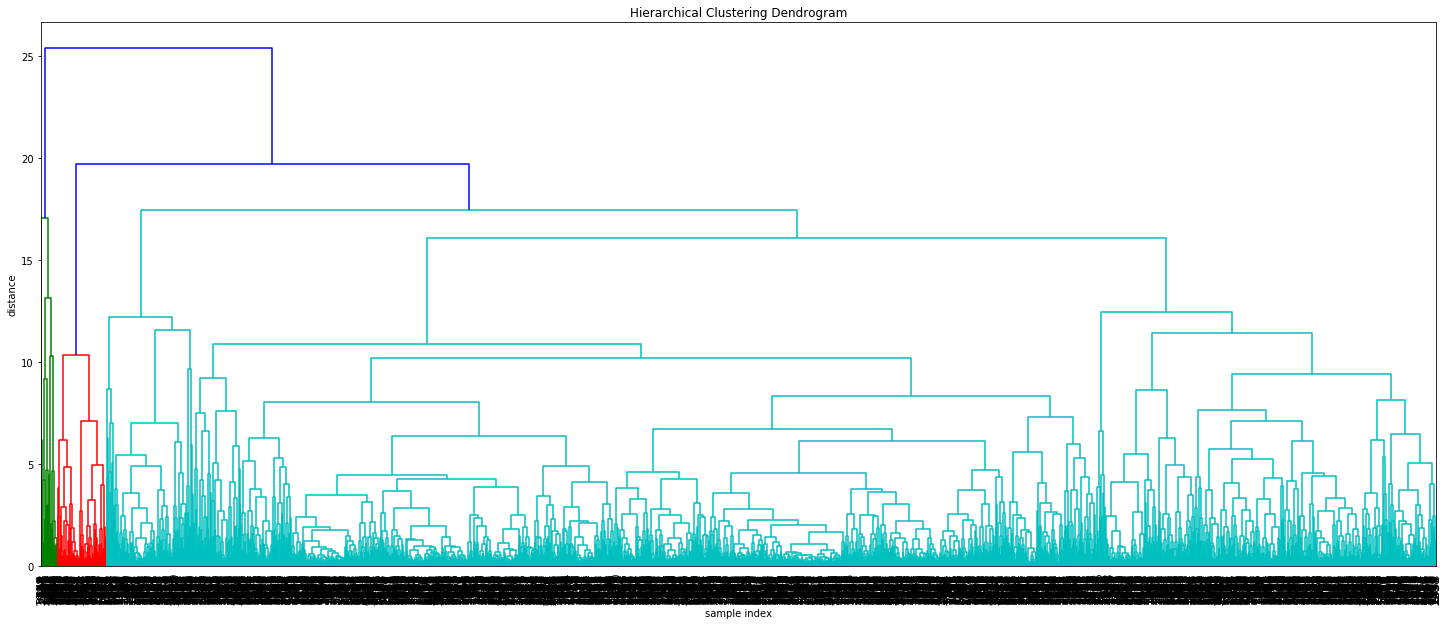

In [10]:
linktype = 'complete'
metric = 'cosine'
make_dendrogram(df, linktype, metric, color_threshold=None)

Text(0.5, 1.0, 'Hierarchical Clustering - Dendogram')

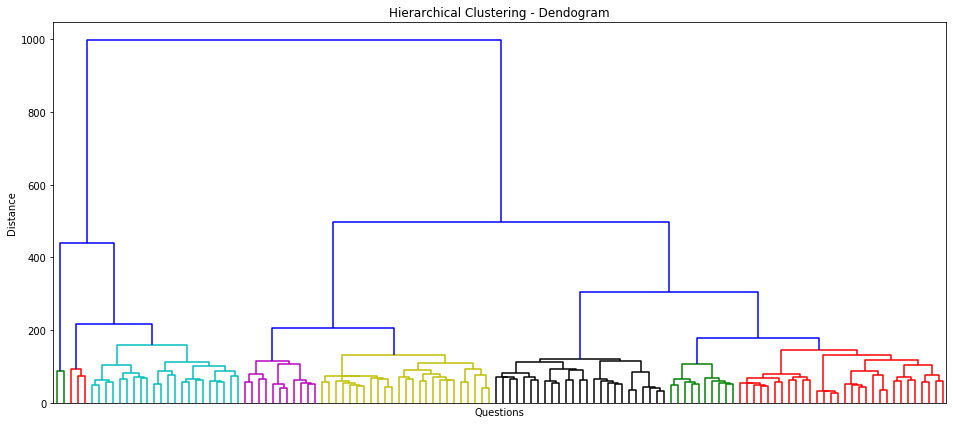

In [11]:
X = StandardScaler(with_mean = False).fit_transform(df)
Z = linkage(X.T, method='ward')

fig, ax = plt.subplots(figsize=(16,7))
dn = dendrogram(Z, color_threshold=160, no_labels=True, ax=ax)
ax.set_ylabel('Distance')
ax.set_xlabel('Questions')
ax.set_title('Hierarchical Clustering - Dendogram')
# plt.savefig('../images/dendogram_w_colors.png')

In [12]:
# Based on the dendogram, I can separate the data into n clusters
labels = fcluster(Z, 7, criterion='maxclust')

In [13]:
np.unique(labels, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 2,  3, 22, 11, 25, 25, 40]))